In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

# Exercise 1

## Preliminary parts

### Epidemic on a known graph

In [206]:
# Number of nodes
n_nodes = 500
# Symmetric 4-regular graph
G = nx.circulant_graph(n_nodes,[1,2])

# Simulation parameters
beta = 0.3
rho = 0.7
weeks = 15
N = 100
inf_0 = 10

In [3]:
# Define infection function
def infection(n,infected,G,beta):
    # Number of infected neigbours
    m = len([nn for nn in infected if nn in list(G.neighbors(n))])
    # Infection probability
    p_inf = 1-(1-beta)**m
    # Infected or not
    result = np.random.choice(2,p=[1-p_inf,p_inf])
    return result

In [4]:
# Define recovery function
def recovery(rho):
    # Recovered or not
    result = np.random.rand(1)[0] >= rho
    return result

In [209]:
# Initialize counters of: new infected, susceptibible, infected and recovered
n_new_inf = []
n_susc = []
n_inf = []
n_rec = []

# Perform the simulation N times
for i in range(N):
    # Randomly sample inf_0 infected
    first_inf = np.random.choice(G.nodes, size = inf_0, replace = False)
    # Initialize infected vectors
    infected = first_inf
    # Initialize recovered vector
    recovered = []
    # Initialize susceptible vector
    susceptible = [n for n in list(G.nodes) if n not in infected and n not in recovered]

    # Simulate for weeks timesteps
    for ii in range(weeks):
        # Initialize new infected and new recovered vectors
        new_infected = []
        new_recovered = []

        # Apply infected function to each susceptible node, if infected add it to new infected
        for n in susceptible:
            if infection(n,infected,G,beta):
                new_infected.append(n)

        # Apply recovery function to each infected node node, if recovered add it to new recovered
        for n in infected:
            if recovery(rho):
                new_recovered.append(n)

        # Count new infected, susceptibible, infected and recovered
        n_new_inf.append(len(new_infected))
        n_susc.append(len(susceptible))
        n_inf.append(len(infected))
        n_rec.append(len(recovered))

        # Update infected, recovered and susceptible
        infected = [n for n in (list(infected)+new_infected) if n not in new_recovered]
        recovered = recovered + new_recovered
        susceptible = [n for n in susceptible if n not in new_infected and n not in new_recovered]

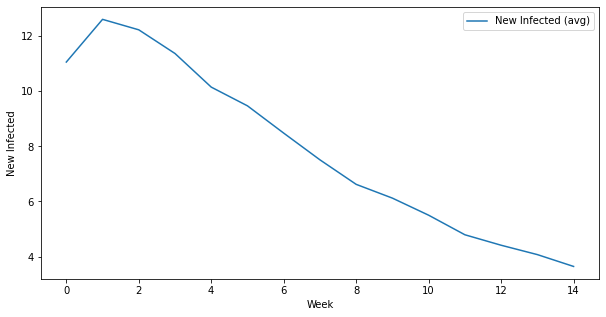

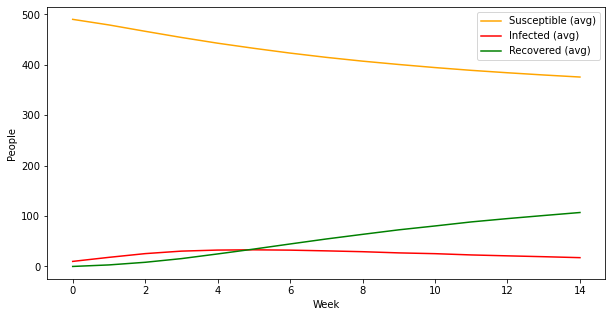

In [210]:
avg_new_inf = np.mean(np.reshape(n_new_inf,(N,weeks)),axis=0)
avg_susc = np.mean(np.reshape(n_susc,(N,weeks)),axis=0)
avg_inf = np.mean(np.reshape(n_inf,(N,weeks)),axis=0)
avg_rec = np.mean(np.reshape(n_rec,(N,weeks)),axis=0)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_new_inf,label='New Infected (avg)')
plt.legend()

plt.xlabel('Week')
plt.ylabel('New Infected')

plt.savefig('Ex1_1a.svg',dpi=180)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_susc,color='orange',label='Susceptible (avg)')
plt.plot(range(weeks),avg_inf,color='red',label='Infected (avg)')
plt.plot(range(weeks),avg_rec,color='green',label='Recovered (avg)')

plt.legend()
plt.xlabel('Week')
plt.ylabel('People')

plt.savefig('Ex1_1b.svg',dpi=180)

### Generate a Random Graph

In [5]:
# Define the generation of a random graph with preferncial attachment model
def preferential_attachment(k,max_nodes):
    G = nx.complete_graph(k+1)
    c = int(k/2)
    while True:
        if len(G) >= max_nodes:
            break
        degrees = [d for n,d in G.degree()]
        nodes_probabilities = np.array(degrees)/sum(degrees)
        new_node = len(G)
        new_connected = np.random.choice(G.nodes,size=c,replace=False,p=list(nodes_probabilities))
        G.add_edges_from([(new_node,to_connect) for to_connect in new_connected])
    return G

In [6]:
# Define the generation of a random graph with small world model
def small_world(k, n_nodes, p=0.05):
    G = nx.newman_watts_strogatz_graph(n_nodes, k, p)
    return G

## Simulate a pandemic without vaccination

In [213]:
# Define number of nodes and average degree
k = 6
n_nodes = 500

# Generate random graph with preferential attachment model
G = preferential_attachment(k,n_nodes)

# Simulation parameters
beta = 0.3
rho = 0.7
weeks = 15
N = 100 
inf_0 = 10

In [214]:
# Initialize counters of: new infected, susceptibible, infected and recovered
n_new_inf = []
n_susc = []
n_inf = []
n_rec = []

# Perform the simulation N times
for i in range(N):
    # Randomly sample inf_0 infected
    first_inf = np.random.choice(G.nodes, size = inf_0, replace = False)
    # Initialize infected vectors
    infected = first_inf
    # Initialize recovered vector
    recovered = []
    # Initialize susceptible vector
    susceptible = [n for n in list(G.nodes) if n not in infected and n not in recovered]

    # Simulate for weeks timesteps
    for ii in range(weeks):
        # Initialize new infected and new recovered vectors
        new_infected = []
        new_recovered = []
        
        # Apply infected function to each susceptible node, if infected add it to new infected
        for n in susceptible:
            if infection(n,infected,G,beta):
                new_infected.append(n)
        
        # Apply recovery function to each infected node node, if recovered add it to new recovered
        for n in infected:
            if recovery(rho):
                new_recovered.append(n)

        # Count new infected, susceptibible, infected and recovered
        n_new_inf.append(len(new_infected))
        n_susc.append(len(susceptible))
        n_inf.append(len(infected))
        n_rec.append(len(recovered))

        # Update infected, recovered and susceptible
        infected = [n for n in (list(infected)+new_infected) if n not in new_recovered]
        recovered = recovered + new_recovered
        susceptible = [n for n in susceptible if n not in new_infected and n not in new_recovered]

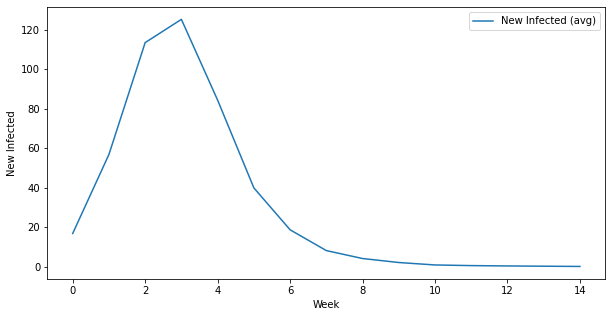

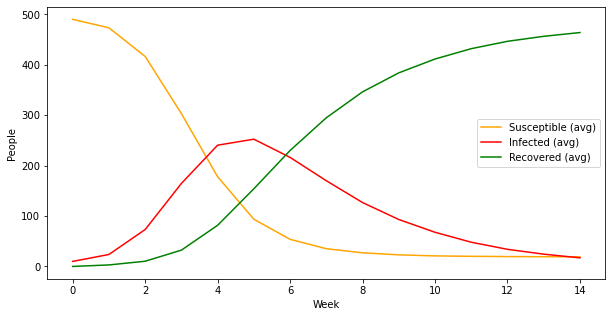

In [215]:
avg_new_inf = np.mean(np.reshape(n_new_inf,(N,weeks)),axis=0)
avg_susc = np.mean(np.reshape(n_susc,(N,weeks)),axis=0)
avg_inf = np.mean(np.reshape(n_inf,(N,weeks)),axis=0)
avg_rec = np.mean(np.reshape(n_rec,(N,weeks)),axis=0)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_new_inf,label='New Infected (avg)')
plt.legend()

plt.xlabel('Week')
plt.ylabel('New Infected')

plt.savefig('Ex1_2a.svg',dpi=180)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_susc,color='orange',label='Susceptible (avg)')
plt.plot(range(weeks),avg_inf,color='red',label='Infected (avg)')
plt.plot(range(weeks),avg_rec,color='green',label='Recovered (avg)')

plt.legend()
plt.xlabel('Week')
plt.ylabel('People')

plt.savefig('Ex1_2b.svg',dpi=180)

## Simulate a pandemic with vaccination

In [218]:
# Define number of nodes and average degree
k = 6
n_nodes = 500

# Generate random graph with preferential attachment model
G = preferential_attachment(k,n_nodes)

# Simulation parameters
beta = 0.3
rho = 0.7
weeks = 15
N = 100 
inf_0 = 10

# Vaccinated percentage per week
vaccinated_perc = [0,5,10,10,10,10,10,5,0,0,0,0,0,0,0]

In [219]:
# Initialize counters of: new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
n_new_inf = []
n_new_vax = []
n_susc = []
n_inf = []
n_rec = []
n_vax = []

# Perform the simulation N times
for i in range(N):
    # Randomly sample inf_0 infected
    first_inf = np.random.choice(G.nodes, size = inf_0, replace = False)
    # Initialize infected vectors
    infected = first_inf
    # Initialize recovered vector
    recovered = []
    # Initialize susceptible vector
    susceptible = [n for n in list(G.nodes) if n not in infected and n not in recovered]
    # Initialize vaccinable vector
    vaccinable = [n for n in list(G.nodes)]
     # Initialize vaccinated vector
    vaccinated = []
    
    # Simulate for weeks timesteps
    for ii in range(weeks):
        # Initialize new infected and new recovered vectors
        new_infected = []
        new_recovered = []

        # Select nodes to vaccinate
        num_vax = min(int(n_nodes*vaccinated_perc[ii]/100),len(vaccinable))
        new_vax = np.random.choice(list(vaccinable),size=num_vax,replace=False)

        # Update infected vector
        infected = [i for i in infected if i not in new_vax]

        # Update vaccinated vector
        vaccinated += list(new_vax)
        
        # Apply infected function to each susceptible node, if infected add it to new infected
        for n in susceptible:
            if infection(n,infected,G,beta):
                new_infected.append(n)
        
        # Apply recovery function to each infected node node, if recovered add it to new recovered
        for n in infected:
            if recovery(rho):
                new_recovered.append(n)

        # Count new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
        n_new_inf.append(len(new_infected))
        n_susc.append(len(susceptible))
        n_inf.append(len(infected))
        n_rec.append(len(recovered))
        n_new_vax.append(len(new_vax))
        n_vax.append(len(vaccinated))

        # Update infected, recovered, susceptible and vaccinated
        infected = [n for n in (list(infected)+new_infected) if n not in new_recovered]
        recovered = recovered + new_recovered
        susceptible = [n for n in susceptible if n not in new_infected and n not in new_recovered and n not in new_vax]
        vaccinable = [n for n in vaccinable if n not in new_recovered and n not in new_vax]

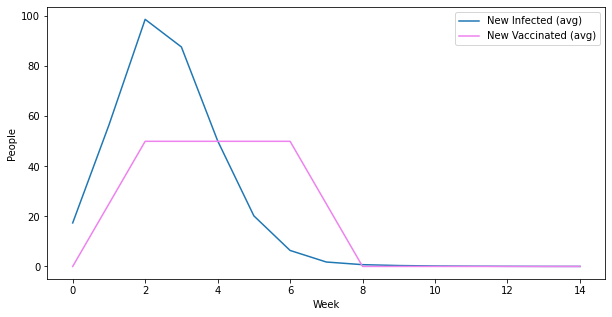

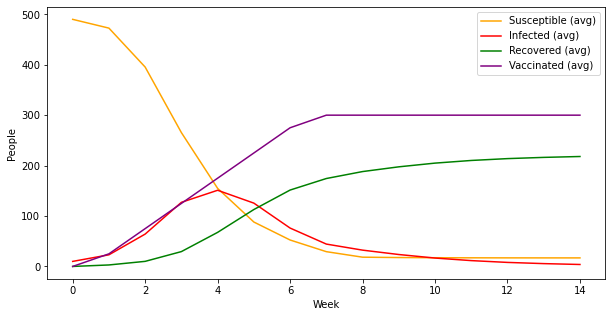

In [220]:
avg_new_inf = np.mean(np.reshape(n_new_inf,(N,weeks)),axis=0)
avg_new_vax = np.mean(np.reshape(n_new_vax,(N,weeks)),axis=0)
avg_susc = np.mean(np.reshape(n_susc,(N,weeks)),axis=0)
avg_inf = np.mean(np.reshape(n_inf,(N,weeks)),axis=0)
avg_rec = np.mean(np.reshape(n_rec,(N,weeks)),axis=0)
avg_vax = np.mean(np.reshape(n_vax,(N,weeks)),axis=0)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_new_inf,label='New Infected (avg)')
plt.plot(range(weeks),avg_new_vax,color='violet',label='New Vaccinated (avg)')
plt.legend()

plt.xlabel('Week')
plt.ylabel('People')

plt.savefig('Ex1_3a.svg',dpi=180)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_susc,color='orange',label='Susceptible (avg)')
plt.plot(range(weeks),avg_inf,color='red',label='Infected (avg)')
plt.plot(range(weeks),avg_rec,color='green',label='Recovered (avg)')
plt.plot(range(weeks),avg_vax,color='purple',label='Vaccinated (avg)')

plt.legend()
plt.xlabel('Week')
plt.ylabel('People')

plt.savefig('Ex1_3b.svg',dpi=180)

## The H1N1 pandemic in Sweden 2009

In [42]:
# Real infected per week
actually_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]
# Vaccinated percentage per week
vaccinated_perc = [5, 4, 7, 8, 8, 8, 7, 7, 5, 1, 0, 0, 0, 0, 0, 0]

# Fixed imulation parameters
inf_0 = 1
N = 10
weeks = 16
n_nodes = 934

# Initial parameters to tune and relative deltas
k_0 = 10
beta_0 = 0.3
rho_0 = 0.6
delta_k_0 = 1
delta_beta_0 = 0.1
delta_rho_0 = 0.1

# Initialize results
best_rmse = float('inf')
best_n_new_inf = None
best_n_susc = None
best_n_inf = None
best_n_rec = None
best_n_vax = None

while True:
    # Initialize/Update parameters vectors
    k_params = [k_0-delta_k_0, k_0, k_0+delta_k_0]
    beta_params = [beta_0-delta_beta_0, beta_0, beta_0+delta_beta_0]
    rho_params = [rho_0-delta_rho_0, rho_0, rho_0+delta_rho_0]

    # For each parameter configuration
    for k in k_params:
        for beta in beta_params:
            for rho in rho_params:
                # Generate random graph with preferential attachment model
                G = preferential_attachment(k,n_nodes)
                
                # Initialize counters of: new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
                n_new_inf = []
                n_new_vax = []
                n_susc = []
                n_inf = []
                n_rec = []
                n_vax = []

                # Perform the simulation N times
                for i in range(N):    
                    # Randomly sample inf_0 infected
                    first_inf = np.random.choice(G.nodes, size = inf_0, replace = False)
                    # Initialize infected vectors
                    infected = first_inf
                    # Initialize recovered vector
                    recovered = []
                    # Initialize susceptible vector
                    susceptible = [n for n in list(G.nodes) if n not in infected and n not in recovered]
                    # Initialize vaccinable vector
                    vaccinable = [n for n in list(G.nodes)]
                    # Initialize vaccinated vector
                    vaccinated = []
                    # Initialize new infected and new recovered vectors
                    new_infected = []
                    # Select nodes to vaccinate
                    num_vax = min(int(n_nodes*vaccinated_perc[0]/100),len(vaccinable))
                    new_vax = np.random.choice(list(vaccinable),size=num_vax,replace=False)
                    # Update vaccinated vector
                    vaccinated += list(new_vax)
                    # Update susceptible and vaccinable
                    susceptible = [n for n in susceptible if n not in new_infected and n not in new_vax]
                    vaccinable = [n for n in vaccinable if n not in new_vax]
                    # Select node to infect
                    new_infected = np.random.choice(list(susceptible),size=actually_inf[0],replace=False)
                    # Update susceptible
                    susceptible = [n for n in susceptible if n not in new_infected]
                    # Update infeted
                    infected = [n for n in (list(infected)+new_infected)]
                        
                    # Count new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
                    n_new_inf.append(len(new_infected))
                    n_susc.append(len(susceptible))
                    n_inf.append(len(infected))
                    n_rec.append(len(recovered))
                    n_new_vax.append(len(new_vax))
                    n_vax.append(len(vaccinated))

                    # Simulate for weeks timesteps
                    for ii in range(weeks-1):
                        # Initialize new infected and new recovered vectors
                        new_infected = []
                        new_recovered = []

                        # Select nodes to vaccinate
                        num_vax = min(int(n_nodes*vaccinated_perc[ii+1]/100),len(vaccinable))
                        new_vax = np.random.choice(list(vaccinable),size=num_vax,replace=False)

                        # Update vaccinated vector
                        vaccinated += list(new_vax)
                        
                        # Apply infected function to each susceptible node, if infected add it to new infected
                        for n in susceptible:
                            if infection(n,infected,G,beta):
                                new_infected.append(n)
                        
                        # Apply recovery function to each infected node node, if recovered add it to new recovered
                        for n in infected:
                            if recovery(rho):
                                new_recovered.append(n)

                        # Count new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
                        n_new_inf.append(len(new_infected))
                        n_susc.append(len(susceptible))
                        n_inf.append(len(infected))
                        n_rec.append(len(recovered))
                        n_new_vax.append(len(new_vax))
                        n_vax.append(len(vaccinated))

                        # Update infected, recovered, susceptible and vaccinable
                        infected = [n for n in (list(infected)+new_infected) if n not in new_recovered]
                        recovered = recovered + new_recovered
                        susceptible = [n for n in susceptible if n not in new_infected and n not in new_recovered and n not in new_vax]
                        vaccinable = [n for n in vaccinable if n not in new_recovered and n not in new_vax]
                                    
                # Compute the mean vector of new infected per weeks
                avg_new_inf = np.mean(np.reshape(n_new_inf,(N,weeks)),axis=0)
                # Compute the Root Mean Square Error
                rmse = np.sqrt(1/15*np.sum((avg_new_inf-actually_inf)**2))
                
                # Update the results if RMSE is lower then the best
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_k, best_beta, best_rho = k, beta, rho
                    best_n_new_inf, best_n_susc, best_n_inf, best_n_rec, best_n_vax= n_new_inf, n_susc, n_inf, n_rec, n_vax

    # If the best parameter are the same as previous iteration stop
    if best_k == k_0 and best_beta == beta_0 and best_rho == rho_0:
        break
    else:
        # Update initial parameters otherwise
        if best_k != k_0:
            k_0 = best_k
        if best_beta != beta_0:
            beta_0 = best_beta
        if best_rho != rho_0:
            rho_0 = best_rho

print(f'Lowest RMSE: {best_rmse} obtained with params: k = {best_k}, beta = {best_beta}, rho = {best_rho}')

Lowest RMSE: 3.495997711669732 obtained with params: k = 8, beta = 0.19999999999999998, rho = 0.5


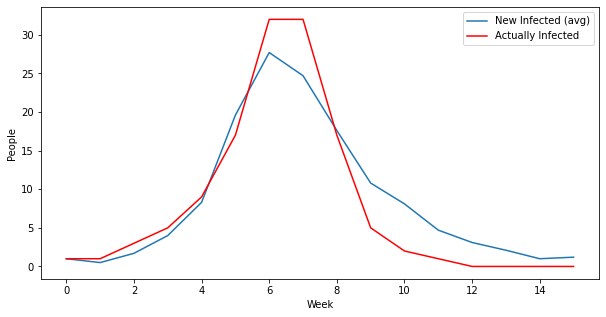

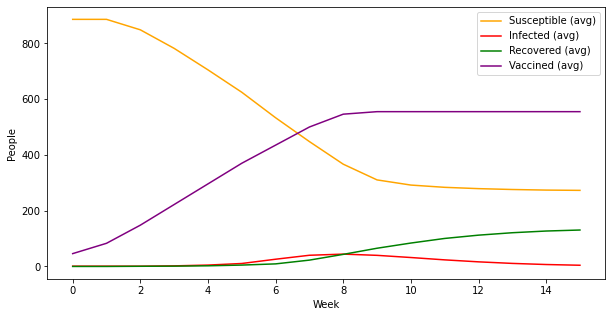

In [43]:
avg_new_inf = np.mean(np.reshape(best_n_new_inf,(N,weeks)),axis=0)
avg_susc = np.mean(np.reshape(best_n_susc,(N,weeks)),axis=0)
avg_inf = np.mean(np.reshape(best_n_inf,(N,weeks)),axis=0)
avg_rec = np.mean(np.reshape(best_n_rec,(N,weeks)),axis=0)
avg_vax = np.mean(np.reshape(best_n_vax,(N,weeks)),axis=0)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_new_inf,label='New Infected (avg)')
plt.plot(range(weeks),actually_inf,label='Actually Infected',color='r')
plt.legend()

plt.xlabel('Week')
plt.ylabel('People')

plt.savefig('Ex1_4a.svg',dpi=180)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_susc,color='orange',label='Susceptible (avg)')
plt.plot(range(weeks),avg_inf,color='red',label='Infected (avg)')
plt.plot(range(weeks),avg_rec,color='green',label='Recovered (avg)')
plt.plot(range(weeks),avg_vax,color='purple',label='Vaccined (avg)')

plt.legend()
plt.xlabel('Week')
plt.ylabel('People')

plt.savefig('Ex1_4b.svg',dpi=180)

## Extra

### Small World

In [14]:
# Initial parameters to tune and relative deltas
k_0 = 10
beta_0 = 0.3
rho_0 = 0.6
delta_k_0 = 1
delta_beta_0 = 0.1
delta_rho_0 = 0.1

# Initialize results
best_rmse = float('inf')
best_n_new_inf = None
best_n_susc = None
best_n_inf = None
best_n_rec = None
best_n_vax = None

while True:
    # Initialize/Update parameters vectors
    k_params = [k_0-delta_k_0, k_0, k_0+delta_k_0]
    beta_params = [beta_0-delta_beta_0, beta_0, beta_0+delta_beta_0]
    rho_params = [rho_0-delta_rho_0, rho_0, rho_0+delta_rho_0]
    
    # For each parameter configuration
    for k in k_params:
        for beta in beta_params:
            for rho in rho_params:
                # Generate random graph with small world model
                G = small_world(k,n_nodes)
                
                # Initialize counters of: new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
                n_new_inf = []
                n_new_vax = []
                n_susc = []
                n_inf = []
                n_rec = []
                n_vax = []
                
                # Perform the simulation N times
                for i in range(N):
                    # Randomly sample inf_0 infected
                    first_inf = np.random.choice(G.nodes, size = inf_0, replace = False)
                    # Initialize infected vectors
                    infected = first_inf
                    # Initialize recovered vector
                    recovered = []
                    # Initialize susceptible vector
                    susceptible = [n for n in list(G.nodes) if n not in infected and n not in recovered]
                    # Initialize vaccinable vector
                    vaccinable = [n for n in list(G.nodes)]
                    # Initialize vaccinated vector
                    vaccinated = []
                    # Initialize new infected and new recovered vectors
                    new_infected = []
                    # Select nodes to vaccinate
                    num_vax = min(int(n_nodes*vaccinated_perc[0]/100),len(vaccinable))
                    new_vax = np.random.choice(list(vaccinable),size=num_vax,replace=False)
                    # Update vaccinated vector
                    vaccinated += list(new_vax)
                    # Update susceptible and vaccinable
                    susceptible = [n for n in susceptible if n not in new_infected and n not in new_vax]
                    vaccinable = [n for n in vaccinable if n not in new_vax]
                    # Select node to infect
                    new_infected = np.random.choice(list(susceptible),size=actually_inf[0],replace=False)
                    # Update susceptible
                    susceptible = [n for n in susceptible if n not in new_infected]
                    # Update infeted
                    infected = [n for n in (list(infected)+new_infected)]
                        
                    # Count new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
                    n_new_inf.append(len(new_infected))
                    n_susc.append(len(susceptible))
                    n_inf.append(len(infected))
                    n_rec.append(len(recovered))
                    n_new_vax.append(len(new_vax))
                    n_vax.append(len(vaccinated))

                    # Simulate for weeks timesteps
                    for ii in range(weeks-1):
                        # Initialize new infected and new recovered vectors
                        new_infected = []
                        new_recovered = []

                        # Select nodes to vaccinate
                        num_vax = min(int(n_nodes*vaccinated_perc[ii+1]/100),len(vaccinable))
                        new_vax = np.random.choice(list(vaccinable),size=num_vax,replace=False)

                        # Update vaccinated vector
                        vaccinated += list(new_vax)
                        
                        # Apply infected function to each susceptible node, if infected add it to new infected
                        for n in susceptible:
                            if infection(n,infected,G,beta):
                                new_infected.append(n)
                        
                        # Apply recovery function to each infected node node, if recovered add it to new recovered
                        for n in infected:
                            if recovery(rho):
                                new_recovered.append(n)

                        # Count new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
                        n_new_inf.append(len(new_infected))
                        n_susc.append(len(susceptible))
                        n_inf.append(len(infected))
                        n_rec.append(len(recovered))
                        n_new_vax.append(len(new_vax))
                        n_vax.append(len(vaccinated))

                        # Update infected, recovered, susceptible and vaccinable
                        infected = [n for n in (list(infected)+new_infected) if n not in new_recovered]
                        recovered = recovered + new_recovered
                        susceptible = [n for n in susceptible if n not in new_infected and n not in new_recovered and n not in new_vax]
                        vaccinable = [n for n in vaccinable if n not in new_recovered and n not in new_vax]
                                                        
                # Compute the mean vector of new infected per weeks
                avg_new_inf = np.mean(np.reshape(n_new_inf,(N,weeks)),axis=0)
                # Compute the Root Mean Square Error
                rmse = np.sqrt(1/15*np.sum((avg_new_inf-actually_inf)**2))
                
                # Update the results if RMSE is lower then the best
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_k, best_beta, best_rho = k, beta, rho
                    best_n_new_inf, best_n_susc, best_n_inf, best_n_rec, best_n_vax= n_new_inf, n_susc, n_inf, n_rec, n_vax

    # If the best parameter are the same as previous iteration stop
    if best_k == k_0 and best_beta == beta_0 and best_rho == rho_0:
        break
    else:
        # Update initial parameters otherwise
        if best_k != k_0:
            k_0 = best_k
        if best_beta != beta_0:
            beta_0 = best_beta
        if best_rho != rho_0:
            rho_0 = best_rho

print(f'Lowest RMSE: {best_rmse} obtained with params: k = {best_k}, beta = {best_beta}, rho = {best_rho}')

Lowest RMSE: 3.260777003517209 obtained with params: k = 12, beta = 0.5, rho = 0.4


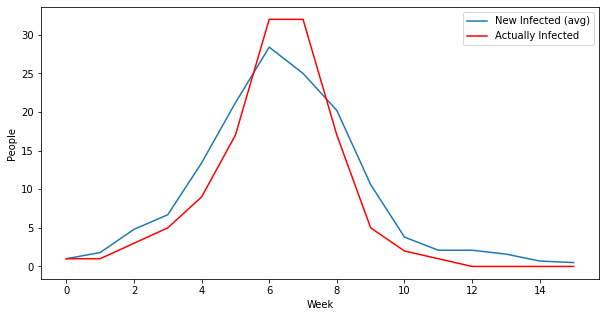

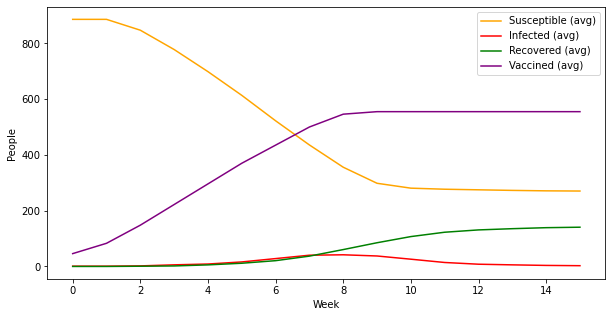

In [15]:
avg_new_inf = np.mean(np.reshape(best_n_new_inf,(N,weeks)),axis=0)
avg_susc = np.mean(np.reshape(best_n_susc,(N,weeks)),axis=0)
avg_inf = np.mean(np.reshape(best_n_inf,(N,weeks)),axis=0)
avg_rec = np.mean(np.reshape(best_n_rec,(N,weeks)),axis=0)
avg_vax = np.mean(np.reshape(best_n_vax,(N,weeks)),axis=0)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_new_inf,label='New Infected (avg)')
plt.plot(range(weeks),actually_inf,label='Actually Infected',color='r')
plt.legend()

plt.xlabel('Week')
plt.ylabel('People')

plt.savefig('Ex1_5a.svg',dpi=180)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_susc,color='orange',label='Susceptible (avg)')
plt.plot(range(weeks),avg_inf,color='red',label='Infected (avg)')
plt.plot(range(weeks),avg_rec,color='green',label='Recovered (avg)')
plt.plot(range(weeks),avg_vax,color='purple',label='Vaccined (avg)')

plt.legend()
plt.xlabel('Week')
plt.ylabel('People')

plt.savefig('Ex1_5b.svg',dpi=180)

### Bayesian Optimization

In [44]:
# Objective function to oprimize
def objective(k,beta,rho):
    # Fixed imulation parameters
    inf_0 = 1
    N = 10
    weeks = 16
    n_nodes = 936

    # Generate random graph with small world model
    G = small_world(int(k),n_nodes)

    # Initialize counters of: new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
    n_new_inf = []
    n_new_vax = []
    n_susc = []
    n_inf = []
    n_rec = []
    n_vax = []
    
    # Perform the simulation N times
    for i in range(N):
        # Randomly sample inf_0 infected
        first_inf = np.random.choice(G.nodes, size = inf_0, replace = False)
        # Initialize infected vectors
        infected = first_inf
        # Initialize recovered vector
        recovered = []
        # Initialize susceptible vector
        susceptible = [n for n in list(G.nodes) if n not in infected and n not in recovered]
        # Initialize vaccinable vector
        vaccinable = [n for n in list(G.nodes)]
        # Initialize vaccinated vector
        vaccinated = []
        # Initialize new infected and new recovered vectors
        new_infected = []
        # Select nodes to vaccinate
        num_vax = min(int(n_nodes*vaccinated_perc[0]/100),len(vaccinable))
        new_vax = np.random.choice(list(vaccinable),size=num_vax,replace=False)
        # Update vaccinated vector
        vaccinated += list(new_vax)
        # Update susceptible and vaccinable
        susceptible = [n for n in susceptible if n not in new_infected and n not in new_vax]
        vaccinable = [n for n in vaccinable if n not in new_vax]
        # Select node to infect
        new_infected = np.random.choice(list(susceptible),size=actually_inf[0],replace=False)
        # Update susceptible
        susceptible = [n for n in susceptible if n not in new_infected]
        # Update infeted
        infected = [n for n in (list(infected)+new_infected)]
            
        # Count new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
        n_new_inf.append(len(new_infected))
        n_susc.append(len(susceptible))
        n_inf.append(len(infected))
        n_rec.append(len(recovered))
        n_new_vax.append(len(new_vax))
        n_vax.append(len(vaccinated))

        # Simulate for weeks timesteps
        for ii in range(weeks-1):
            # Initialize new infected and new recovered vectors
            new_infected = []
            new_recovered = []

            # Select nodes to vaccinate
            num_vax = min(int(n_nodes*vaccinated_perc[ii+1]/100),len(vaccinable))
            new_vax = np.random.choice(list(vaccinable),size=num_vax,replace=False)

            # Update vaccinated vector
            vaccinated += list(new_vax)
            
            # Apply infected function to each susceptible node, if infected add it to new infected
            for n in susceptible:
                if infection(n,infected,G,beta):
                    new_infected.append(n)
            
            # Apply recovery function to each infected node node, if recovered add it to new recovered
            for n in infected:
                if recovery(rho):
                    new_recovered.append(n)

            # Count new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
            n_new_inf.append(len(new_infected))
            n_susc.append(len(susceptible))
            n_inf.append(len(infected))
            n_rec.append(len(recovered))
            n_new_vax.append(len(new_vax))
            n_vax.append(len(vaccinated))

            # Update infected, recovered, susceptible and vaccinable
            infected = [n for n in (list(infected)+new_infected) if n not in new_recovered]
            recovered = recovered + new_recovered
            susceptible = [n for n in susceptible if n not in new_infected and n not in new_recovered and n not in new_vax]
            vaccinable = [n for n in vaccinable if n not in new_recovered and n not in new_vax]
                    
    # Compute the mean vector of new infected per weeks
    avg_new_inf = np.mean(np.reshape(n_new_inf,(N,weeks)),axis=0)
    # Compute the Root Mean Square Error
    rmse = np.sqrt(1/15*np.sum((avg_new_inf-actually_inf)**2))
    # Return the negative value of RMSE to use maximize 
    return -rmse

In [45]:
# Initialize results
best_rmse = float('inf')
best_n_new_inf = None
best_n_susc = None
best_n_inf = None
best_n_rec = None
best_n_vax = None

# Define the optimizer
optimizer = BayesianOptimization(f=objective,pbounds={'k':(8,12),'beta':(0,1),'rho':(0,1)},verbose=2)
# Perform the simulation for 100 iterations
optimizer.maximize(n_iter=500)
    
print('Best RMSE:',-optimizer.max['target'])

|   iter    |  target   |   beta    |     k     |    rho    |
-------------------------------------------------------------
| 1         | -13.58    | 0.1214    | 9.101     | 0.1948    |
| 2         | -37.59    | 0.9952    | 11.27     | 0.06943   |
| 3         | -6.272    | 0.5033    | 10.61     | 7.325e-05 |
| 4         | -6.451    | 0.4982    | 9.182     | 0.4422    |
| 5         | -22.39    | 0.8816    | 10.23     | 0.7903    |
| 6         | -10.47    | 0.4223    | 9.458     | 0.2742    |
| 7         | -13.59    | 0.01279   | 9.672     | 0.5815    |
| 8         | -6.945    | 0.481     | 10.56     | 0.02746   |
| 9         | -4.736    | 1.0       | 8.865     | 0.3264    |
| 10        | -6.127    | 0.814     | 8.718     | 0.9383    |
| 11        | -13.59    | 0.009305  | 11.09     | 0.2398    |
| 12        | -5.176    | 0.7304    | 8.222     | 0.3965    |
| 13        | -10.97    | 0.2429    | 8.054     | 1.0       |
| 14        | -14.04    | 1.0       | 8.0       | 0.9637    |
| 15    

In [46]:
optimizer.max

{'target': -2.3348090571465008,
 'params': {'beta': 1.0, 'k': 8.0, 'rho': 0.15359741871915078}}

In [55]:
# Initialize counters of: new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
n_new_inf = []
n_new_vax = []
n_susc = []
n_inf = []
n_rec = []
n_vax = []

# Take the best parameters form the optimizer
k = optimizer.max['params']['k']
beta = optimizer.max['params']['beta']
rho = optimizer.max['params']['rho']

# Generate random graph with small world model
G = small_world(int(k),n_nodes)

# Perform the simulation N times
for i in range(50):
    # Randomly sample inf_0 infected
    first_inf = np.random.choice(G.nodes, size = inf_0, replace = False)
    # Initialize infected vectors
    infected = first_inf
    # Initialize recovered vector
    recovered = []
    # Initialize susceptible vector
    susceptible = [n for n in list(G.nodes) if n not in infected and n not in recovered]
    # Initialize vaccinable vector
    vaccinable = [n for n in list(G.nodes)]
    # Initialize vaccinated vector
    vaccinated = []
            # Initialize new infected and new recovered vectors
    new_infected = []
    # Select nodes to vaccinate
    num_vax = min(int(n_nodes*vaccinated_perc[0]/100),len(vaccinable))
    new_vax = np.random.choice(list(vaccinable),size=num_vax,replace=False)
    # Update vaccinated vector
    vaccinated += list(new_vax)
    # Update susceptible and vaccinable
    susceptible = [n for n in susceptible if n not in new_infected and n not in new_vax]
    vaccinable = [n for n in vaccinable if n not in new_vax]
    # Select node to infect
    new_infected = np.random.choice(list(susceptible),size=actually_inf[0],replace=False)
    # Update susceptible
    susceptible = [n for n in susceptible if n not in new_infected]
    # Update infeted
    infected = [n for n in (list(infected)+new_infected)]
        
    # Count new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
    n_new_inf.append(len(new_infected))
    n_susc.append(len(susceptible))
    n_inf.append(len(infected))
    n_rec.append(len(recovered))
    n_new_vax.append(len(new_vax))
    n_vax.append(len(vaccinated))

    # Simulate for weeks timesteps
    for ii in range(weeks-1):
        # Initialize new infected and new recovered vectors
        new_infected = []
        new_recovered = []

        # Select nodes to vaccinate
        num_vax = min(int(n_nodes*vaccinated_perc[ii]/100),len(vaccinable))
        new_vax = np.random.choice(list(vaccinable),size=num_vax,replace=False)

        # Update infected vector
        infected = [i for i in infected if i not in new_vax]

        # Update vaccinated vector
        vaccinated += list(new_vax)
        
        # Apply infected function to each susceptible node, if infected add it to new infected
        for n in susceptible:
            if infection(n,infected,G,beta):
                new_infected.append(n)
        
        # Apply recovery function to each infected node node, if recovered add it to new recovered
        for n in infected:
            if recovery(rho):
                new_recovered.append(n)

        # Count new infected, new vaccinated, susceptibible, infected, recovered and vaccinated
        n_new_inf.append(len(new_infected))
        n_susc.append(len(susceptible))
        n_inf.append(len(infected))
        n_rec.append(len(recovered))
        n_new_vax.append(len(new_vax))
        n_vax.append(len(vaccinated))

        # Update infected, recovered, susceptible and vaccinated
        infected = [n for n in (list(infected)+new_infected) if n not in new_recovered]
        recovered = recovered + new_recovered
        susceptible = [n for n in susceptible if n not in new_infected and n not in new_recovered and n not in new_vax]
        vaccinable = [n for n in vaccinable if n not in new_recovered and n not in new_vax]

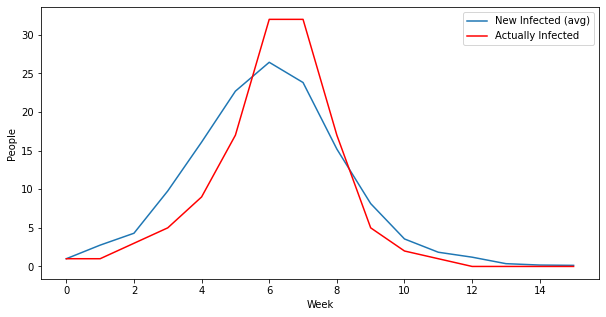

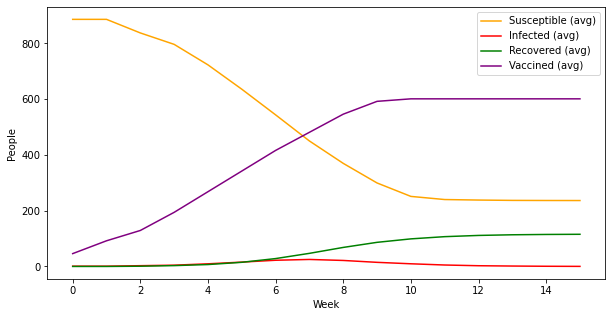

In [58]:
avg_new_inf = np.mean(np.reshape(n_new_inf,(50,weeks)),axis=0)
avg_susc = np.mean(np.reshape(n_susc,(50,weeks)),axis=0)
avg_inf = np.mean(np.reshape(n_inf,(50,weeks)),axis=0)
avg_rec = np.mean(np.reshape(n_rec,(50,weeks)),axis=0)
avg_vax = np.mean(np.reshape(n_vax,(50,weeks)),axis=0)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_new_inf,label='New Infected (avg)')
plt.plot(range(weeks),actually_inf,label='Actually Infected',color='r')
plt.legend()

plt.xlabel('Week')
plt.ylabel('People')

plt.savefig('Ex1_5c.svg',dpi=180)

plt.figure(figsize=(10,5))
plt.plot(range(weeks),avg_susc,color='orange',label='Susceptible (avg)')
plt.plot(range(weeks),avg_inf,color='red',label='Infected (avg)')
plt.plot(range(weeks),avg_rec,color='green',label='Recovered (avg)')
plt.plot(range(weeks),avg_vax,color='purple',label='Vaccined (avg)')

plt.legend()
plt.xlabel('Week')
plt.ylabel('People')

plt.savefig('Ex1_5d.svg',dpi=180)

# Exercise 2

## Part a)

In [270]:
# Create an empty graph
G = nx.Graph()

# Add 10 nodes to the graph
G.add_nodes_from(range(1,11))

# Add edges between the nodes to create a line graph
for i in range(9):
    G.add_edge(i+1, i+2)

# Define possible states 
states = ('red','green')

# Set the state of each node to "red" 
for node in G.nodes():
    G.nodes[node]['state'] = 'red'

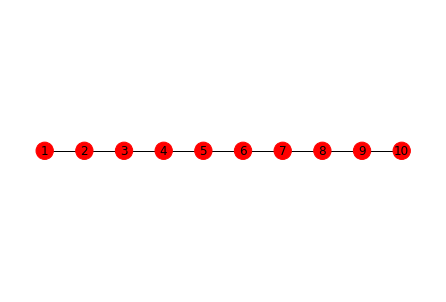

In [271]:
nx.draw(G,with_labels=True,pos={n:[n,0] for n in list(G.nodes)},node_color=list(nx.get_node_attributes(G,'state').values()))
plt.savefig('Ex2_1a.svg',dpi=180)

In [272]:
# Define softmax function
def softmax(v):
    e = np.exp(v)
    if np.sum(e) == 0:
        return [1/len(v) for i in v]
    return e/np.sum(e)

In [273]:
# Define the potential function at a given global state of the graph
def potential(G):
    res = 0
    list(nx.get_node_attributes(G,'state').values())
    W = nx.adjacency_matrix(G).toarray()
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            res += W[i][j]*int(G.nodes[i+1]['state'] == G.nodes[j+1]['state'])

    return res/2

/tmp/ipykernel_15467/259683189.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).toarray()
/tmp/ipykernel_15467/2253417269.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).toarray()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


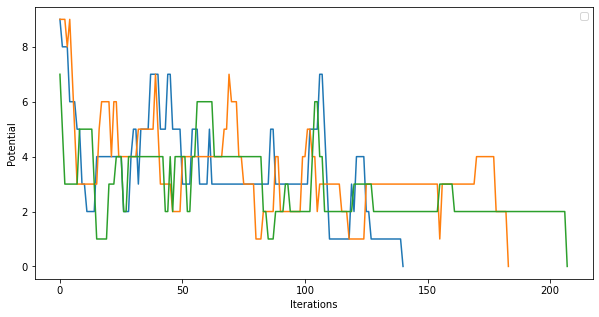

In [277]:
# Compute the adjacency matrix
W = nx.adjacency_matrix(G).toarray()

plt.figure(figsize=(10,5))

# Repete the simulation n_sim times
for iterations in range(3):
    # Initialize the potentials vector
    potentials = []

    # Set the initial state of each node to red
    for node in G.nodes():
        G.nodes[node]['state'] = 'red'

    # Initialize time variable
    t = 0

    # Simulate transaction until the stop condition is reached
    while True:
        # Randomly choice the node to change its color
        to_switch = np.random.choice(list(G.nodes))

        # Initialize probability vector
        probs = []

        # Compute number of neighbors with the same state for each state
        for state in states:
            probs.append(np.sum([x == state for x in list(nx.get_node_attributes(G,'state').values())]*W[to_switch-1]))

        # Apply noise 
        probs = [-x*t/100 for x in probs]
            
        # Apply softmax to obtain probabilities 
        probs = softmax(probs)

        # Choice the new state according to probabilities
        new_state = np.random.choice(states,p=probs)
        
        # Switch selected node to the selected state
        G.nodes[to_switch]['state'] = new_state

        # Compute new potential
        potentials.append(potential(G))

        # End simulation if potential is 0
        if potential(G) == 0:
            break
        
        # Increment time variable
        t += 1
    
    # Plot potentials for each simulation 
    plt.plot(range(len(potentials)),potentials)

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Potential')

plt.savefig('Ex2_1b.svg',dpi=180)

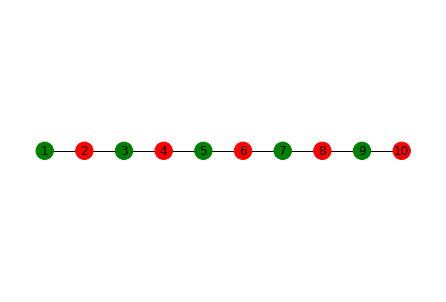

In [278]:
nx.draw(G,with_labels=True,pos={n:[n,0] for n in list(G.nodes)},node_color=list(nx.get_node_attributes(G,'state').values()))#,node_color=list(nx.get_node_attributes(G,'state').values))
plt.savefig('Ex2_1c.svg',dpi=180)

## Part b)

In [279]:
# Load files
W = np.loadtxt('wifi.mat')
C = np.loadtxt('coords.mat')

In [280]:
# Generate grapg from the adjacency matrix
G = nx.from_numpy_matrix(W, create_using=nx.Graph)

In [281]:
# Add coordinates to graph nodes
for i, n in enumerate(G.nodes):
    G.nodes[n]['coord'] = list(C[i])

In [282]:
# Define possible states 
states = list(range(1,9))
states_names = ['red','green','blue','yellow','magenta','cyan','white','black']

# Randomly set the initial state of each node
for node in G.nodes():
    G.nodes[node]['state'] = np.random.choice(states)    


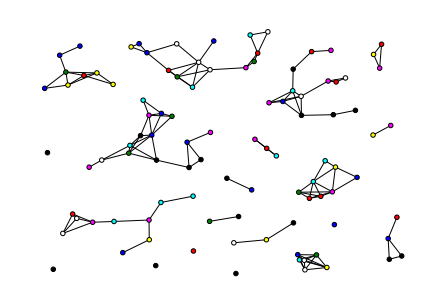

In [283]:

nx.draw(G,pos=nx.get_node_attributes(G,'coord'),with_labels=False,node_color=[states_names[i-1] for i in list(nx.get_node_attributes(G,'state').values())],node_size=20, node_shape='o')
ax=plt.gca()
ax.collections[0].set_edgecolor('#000000')
plt.savefig('Ex2_2a.svg',dpi=180)

In [284]:
# Define cost function
def cost(a,b):
    if a == b:
        return 2
    elif abs(a-b) == 1:
        return 1
    else:
        return 0

In [285]:
# Define potential function
def potential(G):
    res = 0
    list(nx.get_node_attributes(G,'state').values())
    W = nx.adjacency_matrix(G).toarray()
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            res += W[i][j]*cost(G.nodes[i]['state'],G.nodes[j]['state'])

    return res/2

/tmp/ipykernel_15467/804023267.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).toarray()
/tmp/ipykernel_15467/2484448389.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).toarray()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


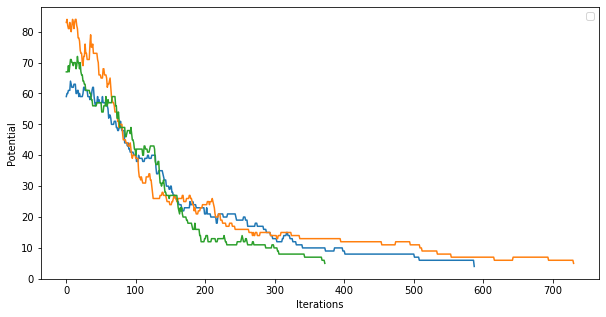

In [293]:
# Compute the adjacency matrix
W = nx.adjacency_matrix(G).toarray()

plt.figure(figsize=(10,5))

behaviours = []

# Repete the simulation n_sim times
for iteration in range(3):
    
    # Initialize the potentials vector
    potentials = []   

    # Set the initial state of each node to red
    for node in G.nodes():
        G.nodes[node]['state'] = np.random.choice(states) 

    # Initialize time variable
    t = 0

    # Simulate transaction until stop condition is reached
    while True:
        # Randomly choice the node to change its color
        to_switch = np.random.choice(list(G.nodes))

        # Initialize probability vector
        probs = []

        # Compute number of neighbors with the same state for each state
        for state in states:
            probs.append(np.sum([cost(x,state) for x in list(nx.get_node_attributes(G,'state').values())]*W[to_switch]))

        # Apply noise 
        probs = [-x*t/100 for x in probs]

        # Apply softmax to obtain probabilities 
        probs = softmax(probs)

        # Choice the new state according to probabilities
        new_state = np.random.choice(states,p=probs)

        # Switch selected node to the selected state
        G.nodes[to_switch]['state'] = new_state

        # Compute new potential
        potentials.append(potential(G))

        # End simulation if potential is 0
        if np.isclose(potential(G),0,atol=5):
            break

        # Increment time variable
        t += 1

    # Plot potentials for each simulation 
    plt.plot(range(len(potentials)),potentials)

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Potential')     

plt.savefig('Ex2_2b.svg',dpi=180)

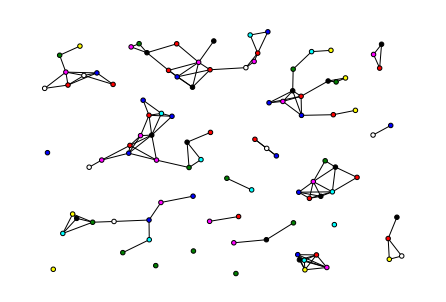

In [287]:

nx.draw(G,pos=nx.get_node_attributes(G,'coord'),with_labels=False,node_color=[states_names[i-1] for i in list(nx.get_node_attributes(G,'state').values())],node_size=20, node_shape='o')
ax=plt.gca()
ax.collections[0].set_edgecolor('#000000')
plt.savefig('Ex2_2a.svg',dpi=180)

/tmp/ipykernel_15467/2484448389.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).toarray()


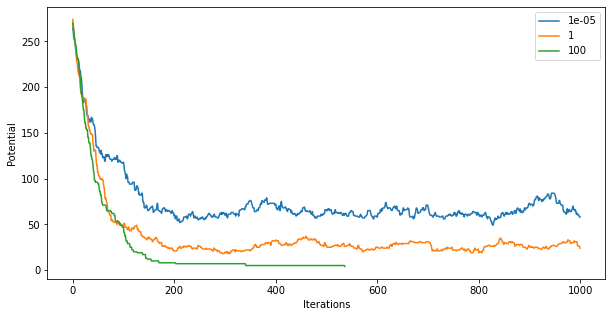

In [292]:
plt.figure(figsize=(10,5))

for eta in [10**x for x in [-5,0,2]]:    
    # Initialize the potentials vector
    potentials = []   

    # Set the initial state of each node to red
    for node in G.nodes():
        G.nodes[node]['state'] = 1

    # Initialize time variable
    t = 0

    # Simulate transaction timesteps times
    for i in range(500):
        # Randomly choice the node to change its color
        to_switch = np.random.choice(list(G.nodes))

        # Initialize probability vector
        probs = []

        # Compute number of neighbors with the same state for each state
        for state in states:
            probs.append(np.sum([cost(x,state) for x in list(nx.get_node_attributes(G,'state').values())]*W[to_switch]))

        # Apply noise 
        probs = [-x*eta for x in probs]

        # Apply softmax to obtain probabilities 
        probs = softmax(probs)

        # Choice the new state according to probabilities
        new_state = np.random.choice(states,p=probs)

        # Switch selected node to the selected state
        G.nodes[to_switch]['state'] = new_state

        # Compute new potential
        potentials.append(potential(G))

        # End simulation if potential is 0
        if np.isclose(potential(G),0,atol=5):
            break

        # Increment time variable
        t += 1

    # Plot potentials for each simulation 
    plt.plot(range(len(potentials)),potentials,label=eta)

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Potential')

plt.savefig('Ex2_3a.svg',dpi=180)

In [289]:
# Define power function
def power4(v):
    return v**4

/tmp/ipykernel_15467/2484448389.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).toarray()


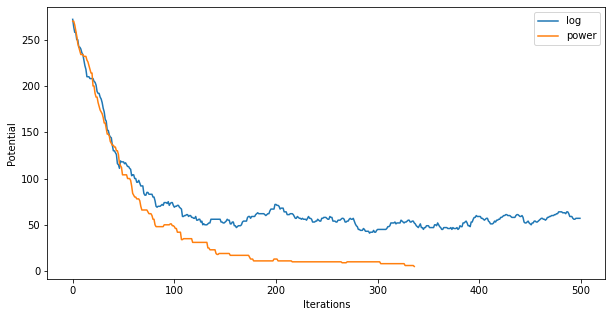

In [295]:
plt.figure(figsize=(10,5))

# Names of used functions
func_names = ['log','power']

for n, eta in enumerate([np.log,power4]):    
    # Initialize the potentials vector
    potentials = []   

    # Set the initial state of each node to red
    for node in G.nodes():
        G.nodes[node]['state'] = 1

    # Initialize time variable
    t = 1

    # Simulate transaction timesteps times
    for i in range(500):
        # Randomly choice the node to change its color
        to_switch = np.random.choice(list(G.nodes))

        # Initialize probability vector
        probs = []

        # Compute number of neighbors with the same state for each state
        for state in states:
            probs.append(np.sum([cost(x,state) for x in list(nx.get_node_attributes(G,'state').values())]*W[to_switch]))

        # Apply noise 
        #print(probs)

        #print([eta(t) for x in probs])

        probs = [-x*eta(t)/100 for x in probs]

        #print(probs)

        # Apply softmax to obtain probabilities 
        probs = softmax(probs)

        # Choice the new state according to probabilities
        new_state = np.random.choice(states,p=probs)

        # Switch selected node to the selected state
        G.nodes[to_switch]['state'] = new_state

        # Compute new potential
        potentials.append(potential(G))

        # End simulation if potential is 0
        if np.isclose(potential(G),0,atol=5):
            break

        # Increment time variable
        t += 1

    # Plot potentials for each simulation 
    plt.plot(range(len(potentials)),potentials,label=func_names[n])

plt.legend()
plt.xlabel('Iterations
    # Initialize the potentials vector
    potentials = []   ')
plt.ylabel('Potential')     

plt.savefig('Ex2_3b.svg',dpi=180)